## Fake News Detection:

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Function for text cleaning
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])  # Remove stop words
    return text



In [2]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Data Preprocessing

In [3]:
data = train_data.drop('id', axis='columns')
test = test_data.drop('id', axis='columns')

In [4]:
column_name = 'text'
mode_value = data[column_name].mode()[0]
data[column_name].fillna(mode_value,inplace=True)
test[column_name].fillna(mode_value,inplace=True)
data.isnull().sum()

title      558
author    1957
text         0
label        0
dtype: int64

In [5]:
data["lower"]=data.text.str.lower() #Lowercase
data["lower"]=[str(data) for data in data.lower] #converting all to string 
data["lower"]=data.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+',' ', x)) #regex
test[ "lower"]=test. text.str.lower() #Lowercase
test["lower"]=[str(data) for data in test.lower] #converting all to stringv
test[ "lower"]=test. lower .apply(lambda x: re.sub('[^A-Za-z0-9 ]t', ' ', x)) #regex

In [7]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.9 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
!pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## EDA

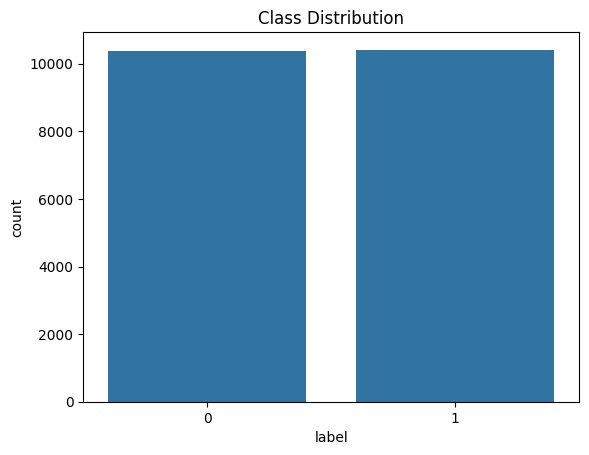

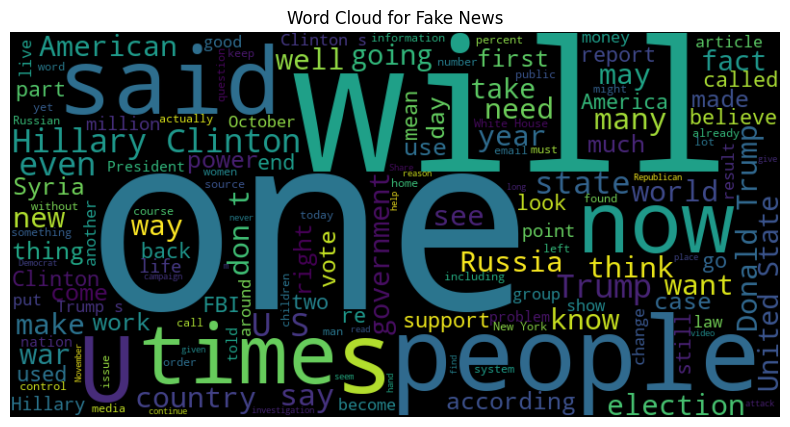

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze class distribution
sns.countplot(x='label', data=train_data)
plt.title('Class Distribution')
plt.show()

# Word frequency analysis
from wordcloud import WordCloud

fake_news = train_data[train_data['label'] == 1]['text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=150).generate(fake_news)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()


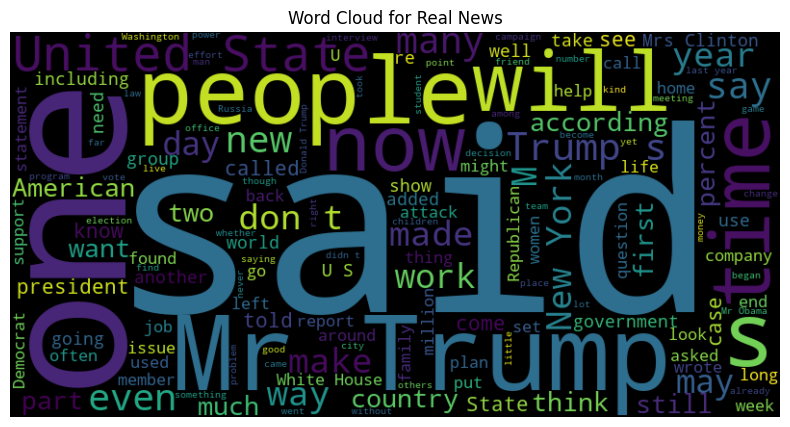

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze class distribution


# Word frequency analysis
from wordcloud import WordCloud

real_news = train_data[train_data['label'] == 0]['text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=150).generate(real_news)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()


## Vectorization:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(data['text'])
X_test_tfidf = tfidf_vectorizer.transform(test['text'])


## Classification (Fake News = Negative, Real News -> Positive

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_data['label'], test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_pred))
print(classification_report(y_val, lr_pred))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_val)
print("Naive Bayes Accuracy:", accuracy_score(y_val, nb_pred))
print(classification_report(y_val, nb_pred))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))


Logistic Regression Accuracy: 0.9475961538461538
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2132
           1       0.94      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160

Naive Bayes Accuracy: 0.8975961538461539
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2132
           1       0.91      0.87      0.89      2028

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160

Random Forest Accuracy: 0.9418269230769231
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2132
           1       0.94      0.94      0.94      2028

    accuracy                           0.94      

### Logistic Regression

In [15]:
# Code for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_data['label'], test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_pred))
print(classification_report(y_val, lr_pred))


Logistic Regression Accuracy: 0.9475961538461538
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2132
           1       0.94      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



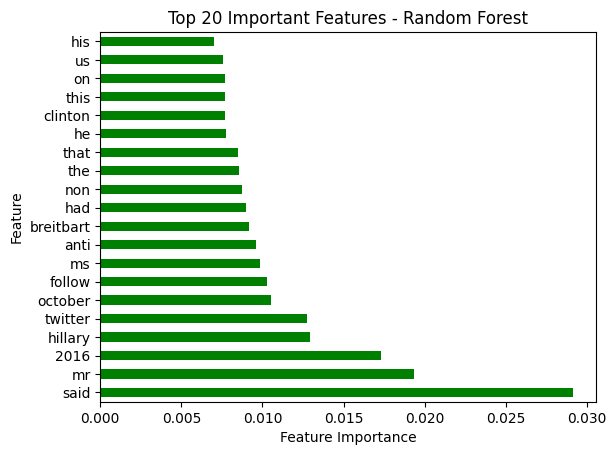

In [16]:
# Feature importance plot for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=tfidf_vectorizer.get_feature_names_out())
feature_importance.nlargest(20).plot(kind='barh', color='green')
plt.title('Top 20 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [17]:
# Example text to predict
new_text = "Donald Trump steal a million dollar from the bank and is caught by police."

# Apply preprocessing
cleaned_text = clean_text(new_text)

# Vectorize the cleaned text
new_text_vectorized = tfidf_vectorizer.transform([cleaned_text])


Logistic Regression Prediction: 1
Naive Bayes Prediction: 1
Random Forest Prediction: 1
